In [1]:
import skrf as rf
from skrf.data import ring_slot
import numpy
import matplotlib.pyplot

#### Ring slot -> Example data that is used to show the vector fitting feature in scikit-rf
##### if you do '?' instead of '()' after a function it should show you the signature, docstring, file, and type

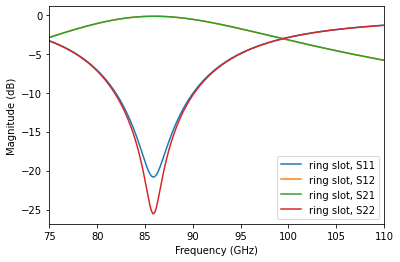

In [10]:
#ring_slot.plot_s_smith() #<- this plots a smith chart
ring_slot.plot_s_db() #<-Decibal plot we can also use the slice operator on a fixed value([100:150]) or type in something readable(['80-90ghz'])
#Another thing is that you can add values into the parameter -> (m=0, n=1)
#ring_slot.plot_s_deg() #<-Degrees
#ring_slot.plot_s_time_db() #<-Decibal plot with a parameter of time


### Using .s or .f is a way to show the array of the data

In [3]:
ring_slot.s

array([[[-0.50372318+0.4578448j ,  0.6134571 +0.36678139j],
        [ 0.6134571 +0.36678139j, -0.19958433+0.6483347j ]],

       [[-0.49581904+0.45707698j,  0.6218194 +0.36403169j],
        [ 0.6218194 +0.36403169j, -0.19079812+0.64429556j]],

       [[-0.48782538+0.4561578j ,  0.63024301+0.36109574j],
        [ 0.63024301+0.36109574j, -0.18198848+0.64003909j]],

       [[-0.47974451+0.45508186j,  0.63872415+0.3579682j ],
        [ 0.63872415+0.3579682j , -0.17316079+0.63556039j]],

       [[-0.47157898+0.45384372j,  0.64725874+0.35464377j],
        [ 0.64725874+0.35464377j, -0.1643208 +0.63085462j]],

       [[-0.4633316 +0.45243787j,  0.65584238+0.35111711j],
        [ 0.65584238+0.35111711j, -0.15547455+0.62591705j]],

       [[-0.45500548+0.45085878j,  0.66447037+0.34738295j],
        [ 0.66447037+0.34738295j, -0.14662842+0.62074303j]],

       [[-0.446604  +0.44910088j,  0.6731377 +0.34343602j],
        [ 0.6731377 +0.34343602j, -0.13778914+0.61532805j]],

       [[-0.43813086+0.4

In [15]:
ring_slot.frequency.f_scaled

array([ 75.   ,  75.175,  75.35 ,  75.525,  75.7  ,  75.875,  76.05 ,
        76.225,  76.4  ,  76.575,  76.75 ,  76.925,  77.1  ,  77.275,
        77.45 ,  77.625,  77.8  ,  77.975,  78.15 ,  78.325,  78.5  ,
        78.675,  78.85 ,  79.025,  79.2  ,  79.375,  79.55 ,  79.725,
        79.9  ,  80.075,  80.25 ,  80.425,  80.6  ,  80.775,  80.95 ,
        81.125,  81.3  ,  81.475,  81.65 ,  81.825,  82.   ,  82.175,
        82.35 ,  82.525,  82.7  ,  82.875,  83.05 ,  83.225,  83.4  ,
        83.575,  83.75 ,  83.925,  84.1  ,  84.275,  84.45 ,  84.625,
        84.8  ,  84.975,  85.15 ,  85.325,  85.5  ,  85.675,  85.85 ,
        86.025,  86.2  ,  86.375,  86.55 ,  86.725,  86.9  ,  87.075,
        87.25 ,  87.425,  87.6  ,  87.775,  87.95 ,  88.125,  88.3  ,
        88.475,  88.65 ,  88.825,  89.   ,  89.175,  89.35 ,  89.525,
        89.7  ,  89.875,  90.05 ,  90.225,  90.4  ,  90.575,  90.75 ,
        90.925,  91.1  ,  91.275,  91.45 ,  91.625,  91.8  ,  91.975,
        92.15 ,  92.

#### Scikit how to cascade

'\ncascade is turning ports into one port\n'

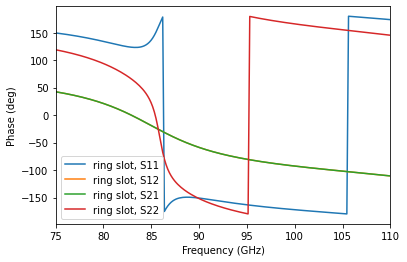

In [11]:
r1 = ring_slot.copy()
r2 = ring_slot.copy()

(r1**r2).plot_s_deg() 

'''
cascade is turning ports into one port
'''

In [12]:
short = rf.data.wr2p2_short
line = rf.data.wr2p2_line
delayshort = line ** short
short_2 = line.inv ** delayshort

short_2 == short

True

##### I was not able to get the media.Freespace() to work, but I was able to get Freespace itself to work

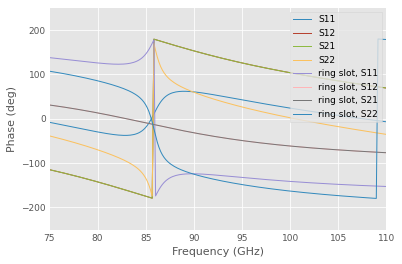

In [18]:
from skrf.media.freespace import Freespace
fs = Freespace(frequency = ring_slot.frequency,z0=50)
#Freespace(frequency = ring_slot.frequency,z0=50)
line = fs.line(90,'deg')
(line**ring_slot**line).plot_s_deg()
ring_slot.plot_s_deg()

##### This is actually insane read_all literally goes to the folder path and it can pull those data

In [19]:
ns_dict = rf.read_all('/Users/JOSEPH/source/repos/scikit-rf/skrf/data/', contains='ro')

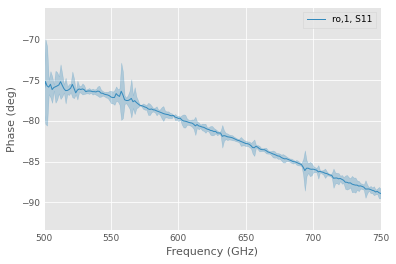

In [20]:
ns = rf.NetworkSet(ns_dict)
#ns.plot_s_db()
#ns.mean_s.plot_s_db(label='mean') #<- plot the mean
#ns.std_s.plot_s_mag() #<- plot the standard deviation
ns.plot_uncertainty_bounds_s_deg()


### Building A Network De-embedding Example from the Documentation Website

In [21]:
rf.stylely()

In [22]:
from skrf.media import CPW

freq = rf.Frequency(1e-3,10,1001,'ghz')
cpw  = CPW(freq, w=0.6e-3, s=0.25e-3, ep_r=10.6)

##### Fixture Network

In [23]:
"""
             l1
    0----+-=======-2
         |
         = c1
         |
        GND

             l1
    1----+-=======-3
         |
         = c1
         |
        GND
"""
l1 = cpw.line(20, 'mm', z0=50, embed=True)
c1 = cpw.shunt_capacitor(C=0.15e-12, z0=50)
l1 = rf.connect(c1, 1, l1, 0)
li = rf.concat_ports([l1, l1], port_order='second')
Fix = li
Fix.name = 'Fix'
Fix.nudge(1e-4)
Left = Fix
# flip fixture for right side
Right = Fix.flipped()

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_12120\1428581271.py:16: FutureWarning: In a future version,`embed` will be deprecated.
The line and media port impedance z0 and characteristic impedance Z0 will be used instead to determine if the line has to be renormalized.
  l1 = cpw.line(20, 'mm', z0=50, embed=True)


##### DUT Network

In [24]:
"""
        l2
    0-=======-2
        l2
    1-=======-3
"""
l2 = cpw.line(50, 'mm', z0=50, embed=True)
DUT = rf.concat_ports([l2, l2], port_order='second')
DUT.name = 'DUT'
DUT.nudge(1e-5)

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_12120\3211005232.py:7: FutureWarning: In a future version,`embed` will be deprecated.
The line and media port impedance z0 and characteristic impedance Z0 will be used instead to determine if the line has to be renormalized.
  l2 = cpw.line(50, 'mm', z0=50, embed=True)


##### Building the Measurements

In [25]:
"""
            Left        Meas         Right
             l1          l2           l1
    0----+-=======-2 0-=======-2 0-=======-+----2
         |                                 |
         = c1                              = c1
         |                                 |
        GND                               GND

             l1          l2           l1
    1----+-=======-3 1-=======-3 1-=======-+----3
         |                                 |
         = c1                              = c1
         |                                 |
        GND                               GND
"""
Meas = Left ** DUT ** Right
Meas.name = 'Meas'
Meas.add_noise_polar(1e-5, 2)

##### De-embedding

In [26]:
DUTd = Left.inv ** Meas ** Right.inv
DUTd.name = 'DUTd'

##### Displaying the Results

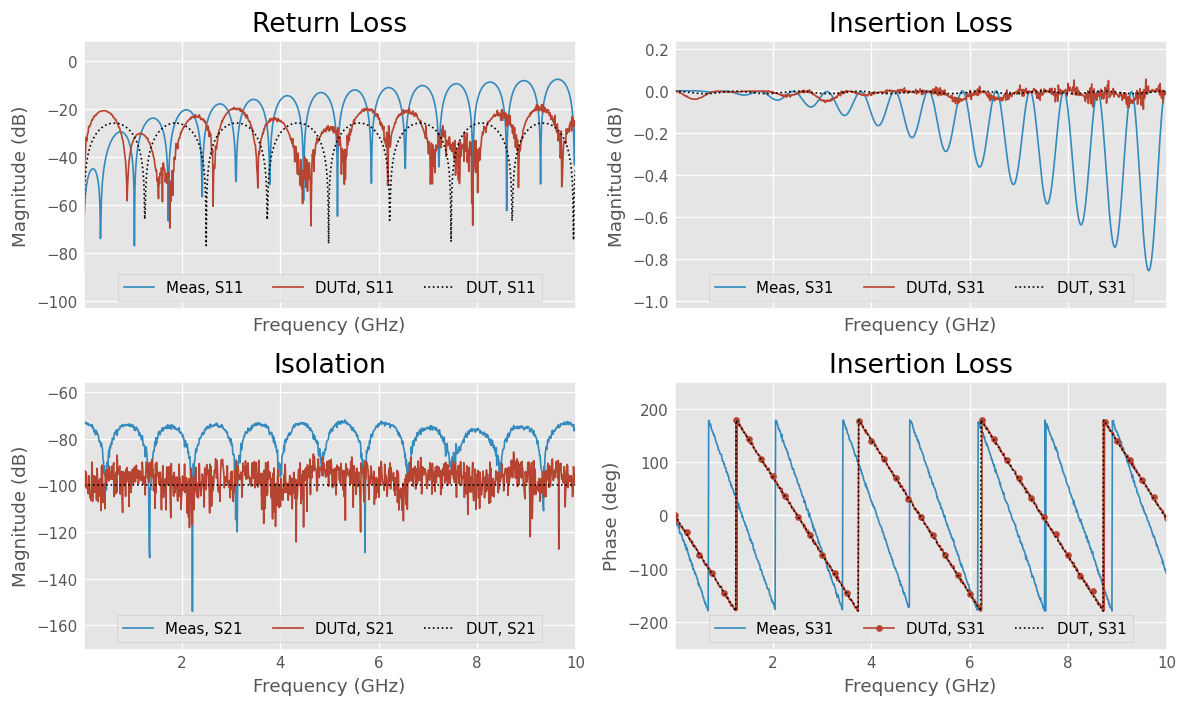

In [27]:
fig, axarr = matplotlib.pyplot.subplots(2,2, sharex=True, figsize=(10,6))

ax = axarr[0,0]
Meas.plot_s_db(m=0, n=0, ax=ax)
DUTd.plot_s_db(m=0, n=0, ax=ax)
DUT.plot_s_db(m=0, n=0, ax=ax, ls=':', color='0.0')
ax.set_title('Return Loss')
ax.legend(loc='lower center', ncol=3)
ax.grid(True)

ax = axarr[0,1]
Meas.plot_s_db(m=2, n=0, ax=ax)
DUTd.plot_s_db(m=2, n=0, ax=ax)
DUT.plot_s_db(m=2, n=0, ax=ax, ls=':', color='0.0')
ax.set_title('Insertion Loss')
ax.legend(loc='lower center', ncol=3)
ax.grid(True)

ax = axarr[1,0]
Meas.plot_s_db(m=1, n=0, ax=ax)
DUTd.plot_s_db(m=1, n=0, ax=ax)
DUT.plot_s_db(m=1, n=0, ax=ax, ls=':', color='0.0')
ax.set_title('Isolation')
ax.legend(loc='lower center', ncol=3)
ax.grid(True)

ax = axarr[1,1]
Meas.plot_s_deg(m=2, n=0, ax=ax)
DUTd.plot_s_deg(m=2, n=0, ax=ax, marker='o', markevery=25)
DUT.plot_s_deg(m=2, n=0, ax=ax, ls=':', color='0.0')
ax.set_title('Insertion Loss')
ax.legend(loc='lower center', ncol=3)
ax.grid(True)

fig.tight_layout()